In [22]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

load data

In [23]:
credit_df = pd.read_csv('credit_card_default_train.csv')
credit_df_test=pd.read_csv('credit_card_default_test.csv')
#credit_df_test=credit_df_test.fillna(0)

make categorical variables on train set

In [24]:
credit_df.Gender = credit_df.Gender.astype('category')
credit_df.EDUCATION_STATUS = credit_df.EDUCATION_STATUS.astype('category')
credit_df.MARITAL_STATUS = credit_df.MARITAL_STATUS.astype('category')
credit_df.AGE = credit_df.AGE.astype('category')
credit_df.Balance_Limit_V1 = credit_df.Balance_Limit_V1.astype('category')

In [25]:
credit_df.describe(include=['category'])

,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE
count,24000,24000,24000,24000,24000
unique,8,2,3,2,4
top,1M,M,Other,Other,31-45
freq,5951,14460,11597,13070,12124


make categorical variables on test set

In [26]:
credit_df_test.Gender = credit_df.Gender.astype('category')
credit_df_test.EDUCATION_STATUS = credit_df.EDUCATION_STATUS.astype('category')
credit_df_test.MARITAL_STATUS = credit_df.MARITAL_STATUS.astype('category')
credit_df_test.AGE = credit_df.AGE.astype('category')
credit_df_test.Balance_Limit_V1 = credit_df.Balance_Limit_V1.astype('category')

In [27]:
credit_df_test.describe(include=['category'])

,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE
count,6000,6000,6000,6000,6000
unique,8,2,3,2,4
top,1M,M,Other,Other,31-45
freq,1423,3466,2753,3339,2981


plot kde plots for categorical variables

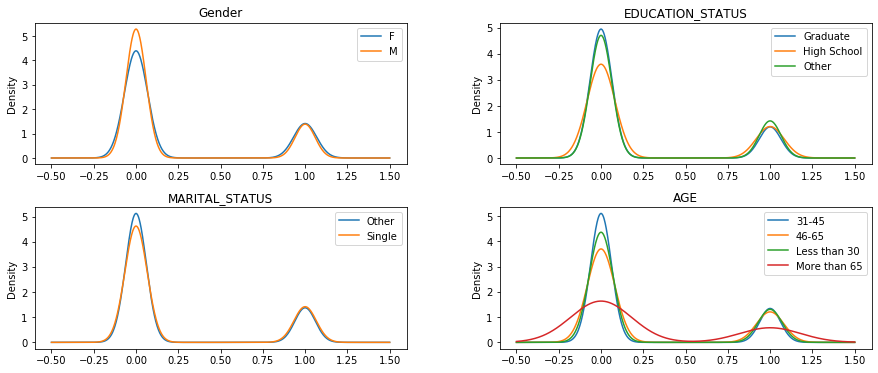

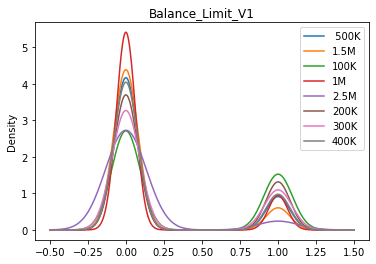

In [28]:
f, axes = plt.subplots(2, 2, figsize=(15, 6))
f.subplots_adjust(hspace=.3, wspace=.25)
credit_df.groupby('Gender').NEXT_MONTH_DEFAULT.plot(kind='kde', ax=axes[0][0], legend=True, title='Gender')
credit_df.groupby('EDUCATION_STATUS').NEXT_MONTH_DEFAULT.plot(kind='kde', ax=axes[0][1], legend=True, title='EDUCATION_STATUS')
credit_df.groupby('MARITAL_STATUS').NEXT_MONTH_DEFAULT.plot(kind='kde', ax=axes[1][0], legend=True, title='MARITAL_STATUS')
credit_df.groupby('AGE').NEXT_MONTH_DEFAULT.plot(kind='kde', ax=axes[1][1], legend=True, title='AGE')
plt.show()
credit_df.groupby('Balance_Limit_V1').NEXT_MONTH_DEFAULT.plot(kind='kde', legend=True, title='Balance_Limit_V1')
plt.show()

plot correlation matrix for numerical variables

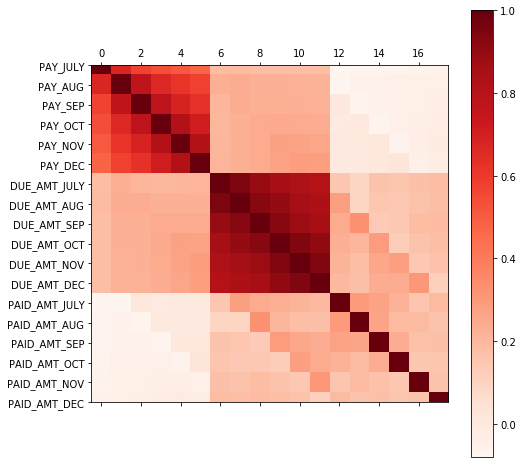

In [29]:
plt.figure(figsize=(8,8))
df=credit_df[['PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT',
       'PAY_NOV', 'PAY_DEC', 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP',
       'DUE_AMT_OCT', 'DUE_AMT_NOV', 'DUE_AMT_DEC', 'PAID_AMT_JULY',
       'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV',
       'PAID_AMT_DEC']]
plt.matshow(df.corr(), cmap=plt.cm.Reds, fignum=1)
plt.colorbar()
tick_marks = [i for i in range(len(df.columns))]
#plt.xticks(tick_marks, df.columns)
plt.yticks(tick_marks, df.columns)
plt.show()

create a numerical data set on train data

In [30]:
numer_credit_df=credit_df[['PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT',
       'PAY_NOV', 'PAY_DEC', 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP',
       'DUE_AMT_OCT', 'DUE_AMT_NOV', 'DUE_AMT_DEC', 'PAID_AMT_JULY',
       'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV',
       'PAID_AMT_DEC']].copy()
#one hot encording
for column in ['AGE','EDUCATION_STATUS','Gender','MARITAL_STATUS','Balance_Limit_V1']:
    dummies = pd.get_dummies(credit_df[column])
    if 'Other' in dummies.columns:
        dummies= dummies.rename(columns={'Other': 'Other_'+column})
    numer_credit_df=numer_credit_df.join(dummies)
numer_credit_df.head()

,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,...,Other_MARITAL_STATUS,Single,500K,1.5M,100K,1M,2.5M,200K,300K,400K
0,-1,-1,-1,-1,-1,-1,3248,3389,6004,39418,...,1,0,0,0,0,1,0,0,0,0
1,0,-1,-1,-1,-1,0,353351,151818,26948,43530,...,1,0,0,0,0,1,0,0,0,0
2,4,3,2,2,-2,-2,16681,16082,15477,0,...,0,1,0,0,1,0,0,0,0,0
3,2,0,0,0,0,0,90457,92848,95193,97309,...,0,1,0,0,0,0,0,1,0,0
4,2,2,0,0,0,0,429556,419466,429785,435354,...,1,0,0,0,0,1,0,0,0,0


create a numerical data set on test data

In [31]:
numer_credit_df_test=credit_df_test[['PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT',
       'PAY_NOV', 'PAY_DEC', 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP',
       'DUE_AMT_OCT', 'DUE_AMT_NOV', 'DUE_AMT_DEC', 'PAID_AMT_JULY',
       'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV',
       'PAID_AMT_DEC']].copy()
#one hot encording
for column in ['AGE','EDUCATION_STATUS','Gender','MARITAL_STATUS','Balance_Limit_V1']:
    dummies = pd.get_dummies(credit_df_test[column])
    if 'Other' in dummies.columns:
        dummies= dummies.rename(columns={'Other': 'Other_'+column})
    numer_credit_df_test=numer_credit_df_test.join(dummies)
numer_credit_df_test.head()

,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,...,Other_MARITAL_STATUS,Single,500K,1.5M,100K,1M,2.5M,200K,300K,400K
0,0,0,0,0,0,0,194188,198510,128316,311201,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,87115,89427,91823,94181,...,1,0,0,0,0,1,0,0,0,0
2,-1,-1,2,0,0,-1,2693,9573,8984,11294,...,0,1,0,0,1,0,0,0,0,0
3,1,-1,-1,-2,-2,-2,0,5775,5775,0,...,0,1,0,0,0,0,0,1,0,0
4,0,0,-2,-2,-2,-2,85257,0,0,0,...,1,0,0,0,0,1,0,0,0,0


normalize train data

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(numer_credit_df)
scaled_df=pd.DataFrame(scaled_values)

normalize test data

In [33]:
scaled_values_test = scaler.fit_transform(numer_credit_df_test)
scaled_df_test=pd.DataFrame(scaled_values_test)

extract X & y from train set

In [34]:
columns=['Client_ID', 'Balance_Limit_V1', 'Gender', 'EDUCATION_STATUS',
       'MARITAL_STATUS', 'AGE', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT',
       'PAY_NOV', 'PAY_DEC', 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP',
       'DUE_AMT_OCT', 'DUE_AMT_NOV', 'DUE_AMT_DEC', 'PAID_AMT_JULY',
       'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV',
       'PAID_AMT_DEC', 'NEXT_MONTH_DEFAULT']

X=scaled_df
'''X=credit_df[['Balance_Limit_V1', 'Gender', 'EDUCATION_STATUS',
       'MARITAL_STATUS', 'AGE', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT',
       'PAY_NOV', 'PAY_DEC', 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP',
       'DUE_AMT_OCT', 'DUE_AMT_NOV', 'DUE_AMT_DEC', 'PAID_AMT_JULY',
       'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV',
       'PAID_AMT_DEC']]'''
y=credit_df[['NEXT_MONTH_DEFAULT']]

In [35]:
from sklearn import datasets, linear_model, metrics 
from sklearn.model_selection import train_test_split   
from sklearn.svm import SVC
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=1) # splitting data as train & validation sets


use feature importance for feature selection

In [36]:
from numpy import sort
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
# fit model on all training data
model = xgb.XGBClassifier(random_state=1,learning_rate=0.01, max_depth=4)
model.fit(X_train, y_train)
# make predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = xgb.XGBClassifier(random_state=1,learning_rate=0.01, max_depth=4)
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 82.31%


C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.000, n=37, Accuracy: 82.31%


C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.000, n=37, Accuracy: 82.31%


C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.000, n=37, Accuracy: 82.31%


C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.000, n=37, Accuracy: 82.31%


C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.000, n=37, Accuracy: 82.31%


C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.000, n=37, Accuracy: 82.31%


C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.000, n=37, Accuracy: 82.31%


C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.000, n=37, Accuracy: 82.31%


C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.000, n=37, Accuracy: 82.31%


C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.000, n=37, Accuracy: 82.31%


C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.000, n=37, Accuracy: 82.31%


C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.000, n=37, Accuracy: 82.31%


C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.000, n=37, Accuracy: 82.31%


C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.001, n=24, Accuracy: 82.31%


C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.005, n=23, Accuracy: 82.31%


C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.006, n=22, Accuracy: 82.29%


C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.006, n=21, Accuracy: 82.29%


C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.007, n=20, Accuracy: 82.29%


C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.007, n=19, Accuracy: 82.31%


C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.007, n=18, Accuracy: 82.31%


C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.008, n=17, Accuracy: 82.31%


C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.008, n=16, Accuracy: 82.28%


C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.008, n=15, Accuracy: 82.28%


C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.008, n=14, Accuracy: 82.28%


C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.009, n=13, Accuracy: 82.35%


C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.016, n=12, Accuracy: 82.33%


C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.020, n=11, Accuracy: 82.32%


C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.021, n=10, Accuracy: 82.43%


C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.022, n=9, Accuracy: 82.36%


C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.022, n=8, Accuracy: 82.35%


C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.023, n=7, Accuracy: 82.33%


C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.024, n=6, Accuracy: 82.32%


C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.031, n=5, Accuracy: 82.26%


C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.032, n=4, Accuracy: 82.08%


C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.032, n=3, Accuracy: 82.06%


C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.112, n=2, Accuracy: 82.12%


C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.566, n=1, Accuracy: 82.11%


train the best model

In [41]:
S_thresh=0.020
model = xgb.XGBClassifier(random_state=1,learning_rate=0.01, max_depth=4)
model.fit(X_train, y_train)
selection = SelectFromModel(model, threshold=S_thresh, prefit=True)
select_X_train = selection.transform(X_train)
# train model
selection_model = xgb.XGBClassifier(random_state=1,learning_rate=0.01, max_depth=4)
selection_model.fit(select_X_train, y_train)
# eval model
select_X_test = selection.transform(X_test)
y_pred = selection_model.predict(select_X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
cof_matrix=metrics.confusion_matrix(y_test, y_pred)
Pr=cof_matrix[1][1]/(cof_matrix[0][1]+cof_matrix[1][1])#Precision
Re=cof_matrix[1][1]/(cof_matrix[1][0]+cof_matrix[1][1]) #Recall
F1=2*Re*Pr/(Re+Pr) #F1 score
Acc=(cof_matrix[0][0]+cof_matrix[1][1])/(sum(sum(cof_matrix)))
print(accuracy)
print('confusion_matrix\n',cof_matrix)
print('Precision',Pr)
print('Recall',Re)
print('F1 score',F1)
print('Accuracy',Acc)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)

C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chanaka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

0.8252777777777778
confusion_matrix
 [[5355  280]
 [ 978  587]]
Precision 0.6770472895040369
Recall 0.37507987220447286
F1 score 0.4827302631578948
Accuracy 0.8252777777777778


predict results

In [76]:
select_X_test = selection.transform(scaled_df_test)
y_pred = selection_model.predict(select_X_test)

In [78]:
df=pd.DataFrame()
df['Client_ID']=credit_df_test['Client_ID']
df['NEXT_MONTH_DEFAULT']=y_pred

#df.to_csv('result_xgboost_select_features.csv')
df

,Client_ID,NEXT_MONTH_DEFAULT
0,A20170,0
1,A16887,0
2,A3430,0
3,A3696,0
4,A20474,0
...,...,...
5995,A11104,0
5996,A2781,0
5997,A1767,0
5998,A1850,0
